**NEDO challenge IBM Quantum hands-on seminar**
# IBM Quantum と Qiskit 入門

Kifumi Numata, IBM Quantum, Sep 17 2025 </br>
© 2025 International Business Machines Corporation

## 目次

1. 単一量子ビット回路 </br>
   - 1.1 状態ベクトルとブロッホ球</br>
   - 1.2 Sampler</br>
   - Exercise 1 </br>
   - 1.3 Estimator </br>
2. 複数量子ビット回路 </br>
3. 実デバイスでの実行 </br>
   - 3.1 IBM Quantumで実行するための準備</br>
   - 3.2 デバイスを指定して実行</br>
   - 3.3 量子デバイスのHW特性の取得</br>
   - Exercise 2</br>
5. その他のシミュレーター</br>
   - 4.1 擬似バックエンド</br>
   - 4.2 Aer simulator</br>
6. パラメーター化された回路</br>
   - 5.1 Sampler </br>
   - 5.2 Estimator</br>
   - 5.3 複数パラメーター</br>
   - Exercise 3

**Google Colabで実行している方は、下のセルの # を外して実行してください。**

In [ ]:
#!pip install 'qiskit[visualization]' qiskit-ibm-runtime qiskit-aer

## 1. 単一量子ビット回路

In [ ]:
from qiskit import QuantumCircuit
# １量子ビット回路を用意
qc_z = QuantumCircuit(1)

# 量子ゲートを適用
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)

# 回路を表示
qc_z.draw('mpl')

そのほかの量子ゲートについてはこちらをご覧ください：https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#methods-to-add-standard-instructions

### 1.1 状態ベクトルとブロッホ球
量子回路の量子状態をシミュレートするQiskit Aerの[StatevevtorSimulator](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.StatevectorSimulator.html#qiskit_aer.StatevectorSimulator)を使います。量子状態のブロッホ球表示も行います。

In [ ]:
# 状態ベクトルシミュレーターの実行
from qiskit_aer import StatevectorSimulator
backend_sv = StatevectorSimulator()
result = backend_sv.run(qc_z).result().get_statevector(qc_z, decimals=3)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

### 1.2 Sampler

[Qiskit Primitive](https://quantum.cloud.ibm.com/docs/en/guides/primitives)のSamplerは量子回路の出力をサンプリングします。実際の量子コンピューターで計算する前に、シミュレーター版の [StatevectorSampler](https://quantum.cloud.ibm.com/docs/en/guides/simulate-with-qiskit-sdk-primitives#use-the-reference-sampler) を使ってみましょう。

In [ ]:
# １量子レジスター、1古典レジスターの回路
qc_z = QuantumCircuit(1, 1)

# 量子演算を適用
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)

# 測定
qc_z.measure(0, 0)

# 回路を表示
qc_z.draw('mpl')

In [ ]:
# Samplerシミュレーター
from qiskit.primitives import StatevectorSampler
sampler_sim = StatevectorSampler()

# 実行
job = sampler_sim.run([qc_z]) # デフォルトのshots数は1024です

In [ ]:
# 結果
results = job.result()
counts = results[0].data.c.get_counts()
print(counts)

In [ ]:
# ヒストグラムを表示
from qiskit.visualization import plot_histogram
plot_histogram(counts)

2つの量子回路をまとめて実行できます。

In [ ]:
# 1つ目の回路
qc_s = QuantumCircuit(1, 1)
qc_s.h(0)
qc_s.s(0)
qc_s.h(0)
qc_s.measure(0, 0)

import numpy as np
# 2つ目の回路
qc_a = QuantumCircuit(1, 1)
qc_a.h(0)
qc_a.rz(np.pi/11, 0)
qc_a.h(0)
qc_a.measure(0, 0)

# 回路の表示
display(qc_s.draw('mpl'))
display(qc_a.draw('mpl'))

In [ ]:
# 実行
job = sampler_sim.run([qc_s, qc_a])
results = job.result()

In [ ]:
# カウント数の表示
counts_all = [res.data.c.get_counts() for res in results]
print(counts_all[0], counts_all[1])

In [ ]:
# ヒストグラムを表示
plot_histogram(counts_all, legend=['qc_s', 'qc_z'])

<div class="alert alert-success">
    <h3>Exercise 1.</h3>
    <p>
    上記の量子回路と同じように、`H` ゲート間に任意の角度を持つ `p` ゲートを置いた回路を作成してください。StatevectorSampler を用いて回路をシミュレーションし、結果をグラフに表示してください。</p>
</div>

- 参考：Phase ゲート([p gate](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.PhaseGate))

In [ ]:
## ここに回路を書いてください

myqc = 





In [ ]:
# 実行
job = sampler_sim.run([myqc])
counts = job.result()[0].data.c.get_counts()
print(counts)

In [ ]:
# ヒストグラムを表示
plot_histogram(counts)

### 1.3 Estimator
[Qiskit Primitive](https://quantum.cloud.ibm.com/docs/en/guides/primitives)のEstimatorは量子回路によって準備された状態に関して、オブザーバブル(観測可能量)の期待値を計算します。

量子力学において、オブザーバブルは測定可能な物理的特性に対応します。例えば、スピン系を考える場合、系のエネルギーであったり、磁化などに興味を持つとします。これらの物理量を量子コンピューターでは、パウリ演算子で表現されるオブザーバブルで表現して測定することで、その期待値を求めます。量子力学以外の世界でも、最適化問題におけるコスト関数などはパウリ演算子で表現され、その期待値を求めます。

QiskitではPrimitiveのEstimatorによって、オブザーバブルの期待値を求めることができ、[StatevectorEstimator](https://quantum.cloud.ibm.com/docs/en/guides/simulate-with-qiskit-sdk-primitives#use-the-reference-estimator)は、そのシミュレーター版です。

In [ ]:
from qiskit.primitives import StatevectorEstimator
estimator_sim = StatevectorEstimator()

**注意**：Estimator の回路は measurement を含みません。

In [ ]:
# さきほどの回路からmeasurementを取り除く
qc_z.remove_final_measurements()
qc_z.draw('mpl')

In [ ]:
# オブザーバブル(観測可能量)の設定
from qiskit.quantum_info import Pauli, SparsePauliOp

# 以下のどちらでも同じです。
#observables = [Pauli('Z')]
observables = [SparsePauliOp(['Z'], [1])]
print(observables)

In [ ]:
# pub(primitive unified block) の設定
pub = (qc_z, observables) #量子回路, オブザーバブル

# 実行
job = estimator_sim.run([pub])

In [ ]:
# 結果
res = job.result()

# 期待値の表示
expvals = res[0].data.evs
print(expvals)

## 2. 複数量子ビット回路

2量子ビット回路でベル状態を作ります。

In [ ]:
# 2量子レジスター、2古典レジスターの回路
qc_ent = QuantumCircuit(2, 2)

qc_ent.h(0)
qc_ent.cx(0, 1)

qc_ent.measure(range(2), range(2))

qc_ent.draw('mpl')

In [ ]:
# Samplerシミュレーター
sampler_sim = StatevectorSampler()

# 実行
job = sampler_sim.run([qc_ent], shots=10000)

# 結果を表示
counts_ent = job.result()[0].data.c.get_counts()
plot_histogram(counts_ent)

## 3. 実デバイスでの実行

### 3.1 IBM Quantumで実行するための準備

実量子コンピューターで実験するため次の手順で、API keyとCRNを次のセルのコードに入力してください。

1) https://quantum.cloud.ibm.com/ にサインインし、左側 「API key」の横にある「Create +」をクリックします。

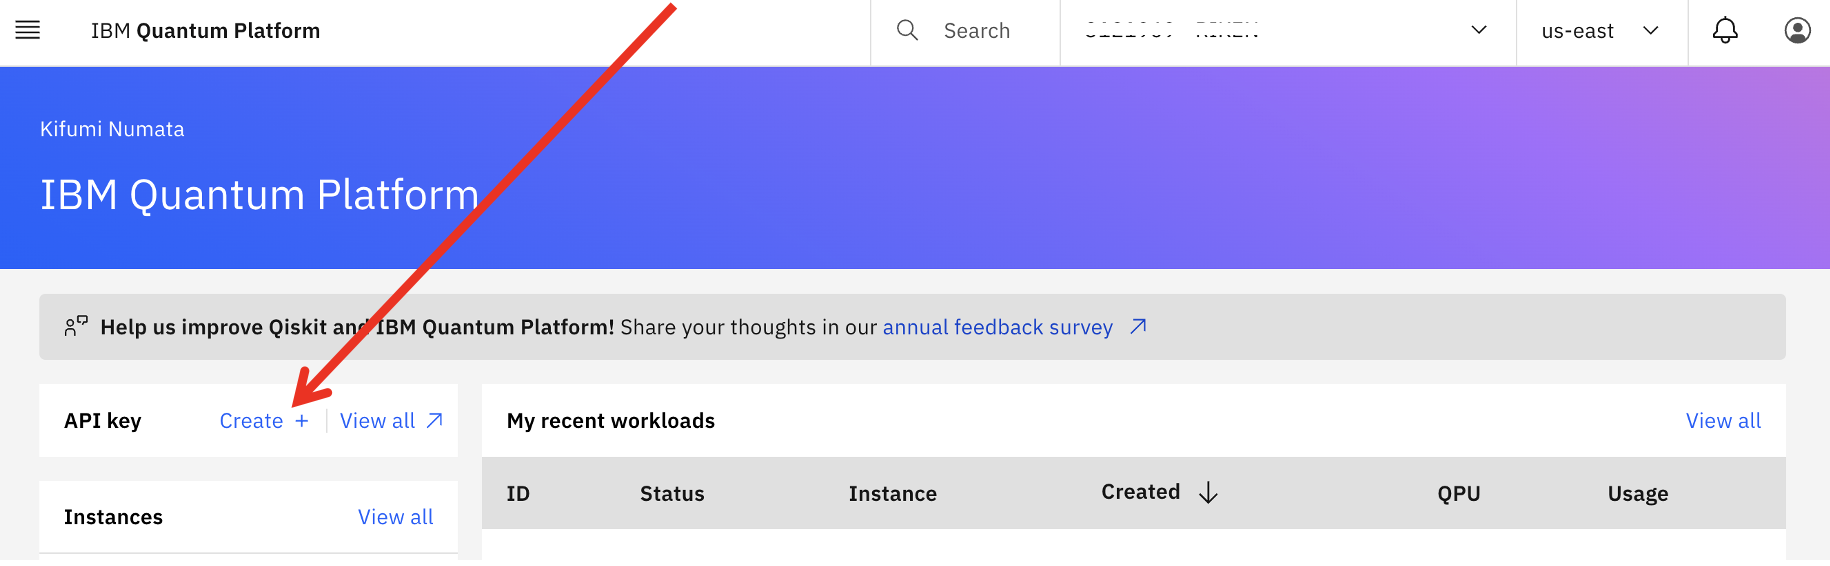

2) API keyの名前（例：my API など）を自由に入力し、「Create」をクリックします。
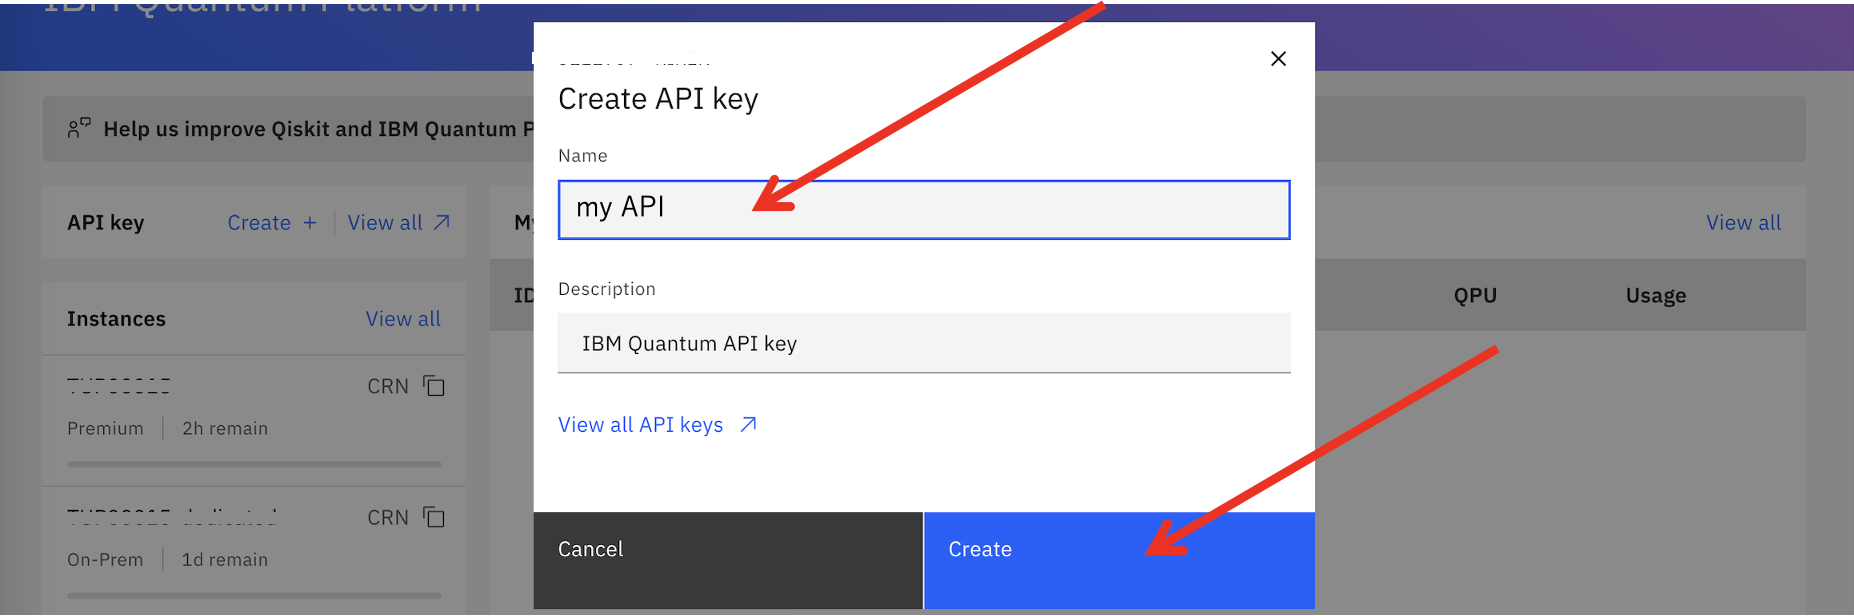

3) 「Download」をクリックして「apikey.json」ファイルを保存します。
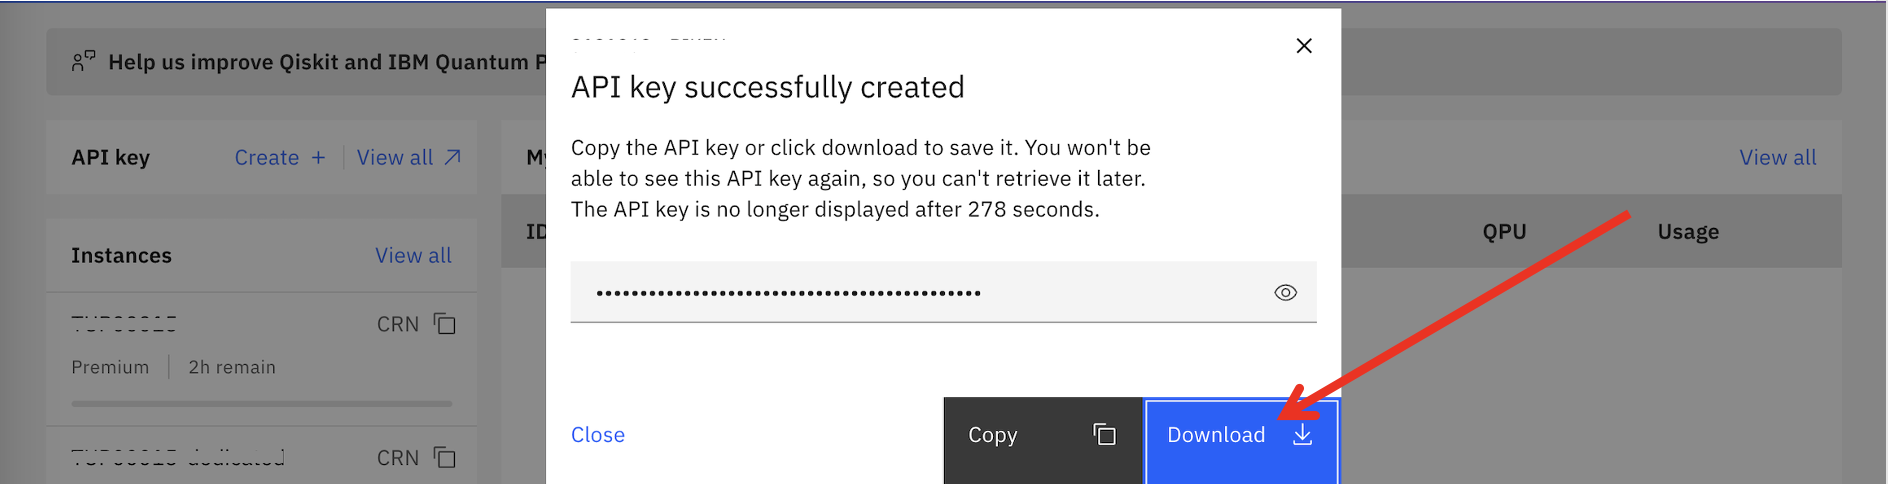

4) 先ほど保存した「apikey.json」ファイルから、apikeyをコピーして、次のセルの `deleteThisAndPasteYourAPIKeyHere` に上書きしてください。
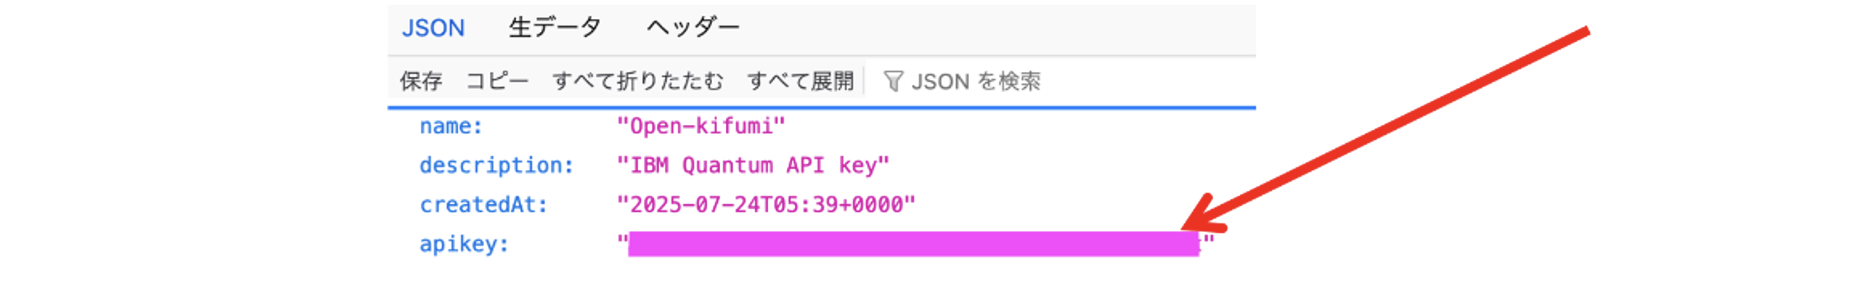

5) CRNをコピーして、次のセルの `deleteThisAndPasteYourCRNHere` に上書きしてください。
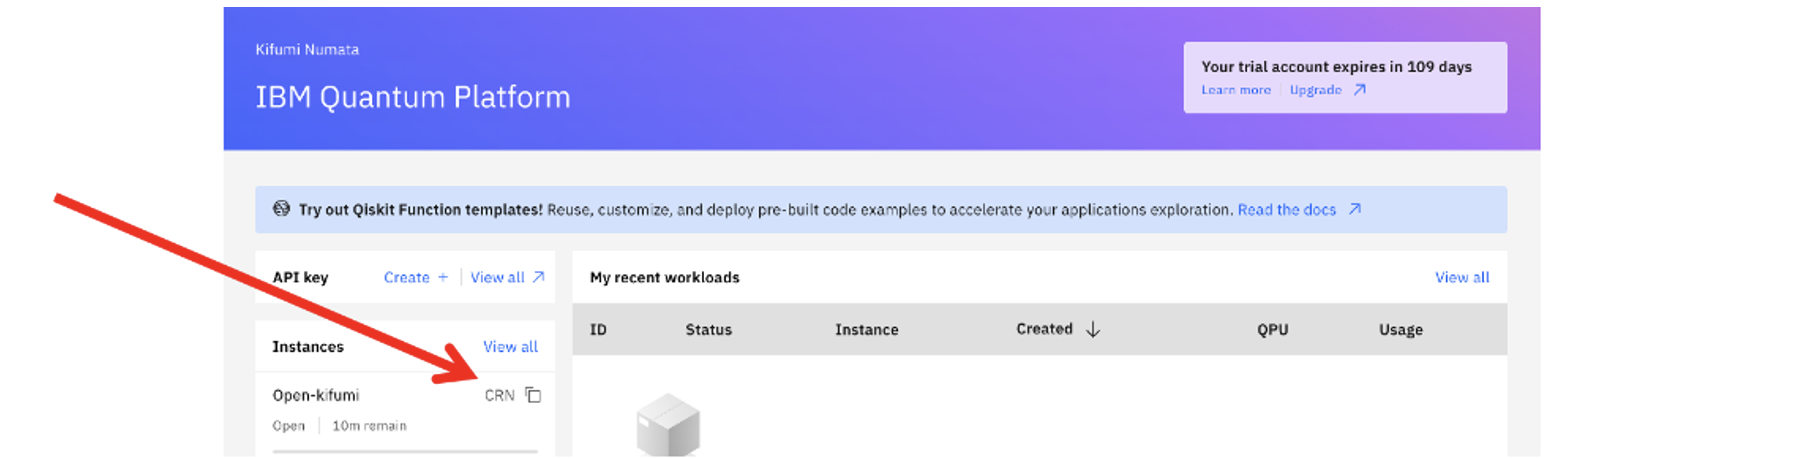

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

service = QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key,
    instance=your_crn,
    set_as_default=True,
    overwrite=True,
)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

### 3.2 デバイスを指定して実行

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_brisbane')

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

In [ ]:
# 実機のバックエンドでの実行に最適な回路にトランスパイルします
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc_ent)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend)
job = sampler.run([isa_circuit]) # デフォルトのショット数は4096です

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

In [ ]:
job = service.job(job.job_id())
#job = service.job("d2voc9jok8rs73cua4k0")
job.status() # ジョブの実行状態を確認します

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
job = service.job('d33vqce6pnbs739j0bn0') # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status()

上記のセルの実行の結果、'DONE' が表示されたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。

In [ ]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

In [ ]:
plot_histogram(result[0].data.c.get_counts())

### 3.3. 量子デバイスのHW特性の取得

デバイスに関する基本情報を取得します。

In [ ]:
backend = service.backend("ibm_torino")

print(
    f"""
{backend.name}, {backend.num_qubits} qubits
processor type = {backend.processor_type}
basis gates = {backend.basis_gates}
"""
)

デバイスのカップリングマップを描画します。

In [ ]:
target = backend.target
target.build_coupling_map().draw()

デバイス特性を取得します。

In [ ]:
import statistics
t1s = [backend.qubit_properties(qq).t1 for qq in range(backend.num_qubits)]
t2s = [backend.qubit_properties(qq).t2 for qq in range(backend.num_qubits)]
cz_errors = [inst_prop.error for inst_prop in target["cz"].values()]
sx_errors = [inst_prop.error for inst_prop in target["sx"].values()]
readout_errors = [inst_prop.error for inst_prop in target["measure"].values()]
print(f"Median T1: {(statistics.median(t1s)*10**6):.2f} \u03bcs")
print(f"Median T2: {(statistics.median(t2s)*10**6):.2f} \u03bcs")
print(f"Median CZ error: {(statistics.median(cz_errors)):.3e}")
print(f"Median SX error: {(statistics.median(sx_errors)):.3e}")
print(f"Median Readout error: {(statistics.median(readout_errors )):.3e}")

結果を [IBM Quantum Platform](https://quantum.cloud.ibm.com/computers) 上のデバイスに対して示されている結果と比べてみてください。

以下のようにデバイスを視覚化することもできます。

In [ ]:
from qiskit.visualization import plot_gate_map

plot_gate_map(backend, font_size=14)

In [ ]:
from qiskit.visualization import plot_error_map

plot_error_map(backend)

<div class="alert alert-success">
    <h3>Exercise 2.</h3>
    `ibm_brisbane` のデバイス特性 (T1時間, T2時間, ECRゲートエラー, SXゲートエラー, 測定エラーの中央値)を出力してください。
    </p>
</div>

In [ ]:
## コードを記入してください

backend =






## 4. その他のシミュレーター
### 4.1 擬似バックエンドでの実行

Fake backend での実行も可能です。Fake backend 一覧はこちらです：https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider#fake-backends

In [ ]:
from qiskit_ibm_runtime import fake_provider
backend_fake = fake_provider.FakeTorontoV2()

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# バックエンドでの実行に最適な回路に変換します
pm = generate_preset_pass_manager(backend=backend_fake, optimization_level=3)
isa_circuit = pm.run(qc_ent)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend_fake)
job = sampler.run([isa_circuit]) # デフォルトのショット数は1024です

result = job.result()
plot_histogram(result[0].data.c.get_counts())

### 4.2 Aer simulator

Qiskit Aerのシミュレーターは、ノイズモデルも実行可能な高性能量子コンピューティングシミュレーターです。詳細はこちらをご覧ください：https://qiskit.github.io/qiskit-aer/tutorials/index.html

In [ ]:
from qiskit_aer import AerSimulator
backend_aer = AerSimulator()
sampler = Sampler(backend_aer)

# 実行
job = sampler.run([qc_ent])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# カウントをプロット
plot_histogram(counts)

## 5. パラメーター化された回路

パラメーター付きの量子ゲートで量子回路を構築し、パラメーターにデータを入力して実行する方法です。

### 5.1 Sampler

In [ ]:
# パラメーターの設定
from qiskit.circuit import Parameter
phi = Parameter('phi')

# 回路の構築
qc_p = QuantumCircuit(1, 1)
qc_p.h(0)
qc_p.p(phi, 0)
qc_p.h(0)
qc_p.measure(0, 0)
qc_p.draw('mpl')

In [ ]:
# パラメーターに入れる値を100個作成
num_angles = 100
angles_p = np.linspace(0, 2*np.pi, num_angles)

In [ ]:
# 100個の回路をまとめてStatevectorSamplerで実行
pub = (qc_p, angles_p)
sampler_sim = StatevectorSampler()
job = sampler_sim.run([pub])

In [ ]:
# 結果
results = job.result()

# 例：3個目の回路の実行結果
k = 3
print(results[0].data.c.get_counts(k))

In [ ]:
import matplotlib.pyplot as plt
# 結果を表示
prob1 = []

for k in range(num_angles):
    counts = results[0].data.c.get_counts(k)
    if '1' in counts:
        prob1.append(counts['1']/sum(counts.values()))
    else:
        prob1.append(0)

fig, ax = plt.subplots()
ax.plot(angles_p, prob1, '.')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('Prob_1');

### 5.2 Estimator

In [ ]:
# 上の回路からmeasurementを削除
qc_p.remove_final_measurements()
qc_p.draw('mpl')

In [ ]:
# 回路とオブザーバブルの設定
circuit = qc_p
observables = Pauli('Z')
parameter_vals = angles_p

# PUB
pub_p = (circuit, observables, parameter_vals) #回路, オブザーバブル, パラメーターの値

# 実行
estimator_sim = StatevectorEstimator()
job = estimator_sim.run([pub_p])

In [ ]:
# 結果
results = job.result()

In [ ]:
fig, ax = plt.subplots()
ax.plot(angles_p, results[0].data.evs)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('expectation value');

### 5.3 複数パラメーター
- 参考：[u gate](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.UGate)

In [ ]:
# 複数パラメーターの設定
from qiskit.circuit import ParameterVector
theta = ParameterVector('theta', 3)
print(len(theta))

# どちらの書き方でも可能です
qc_u = QuantumCircuit(1, 1)
#qc_u.u(theta[0], theta[1], theta[2], 0)
qc_u.u(*theta, 0)
qc_u.measure(0, 0)

qc_u.draw('mpl')

In [ ]:
# 3つのパラメーターに代入する値をそれぞれ4つずつ作ります
angles_u = [[np.pi/k, np.pi/(k+3), np.pi/(k/2+2)] for k in range(3, 7)]
angles_u

In [ ]:
# PUBの設定
pub = (qc_u, angles_u) #回路, パラメーターの値
# 実行
sampler_sim = StatevectorSampler()
job = sampler_sim.run([pub])
results = job.result()

In [ ]:
# カウント結果の取得
counts_all = [results[0].data.c[k].get_counts() for k in range(len(angles_u))]
counts_all

In [ ]:
# 結果を表示
plot_histogram(counts_all, legend=['angles1', 'angles2', 'angles3', 'angles4'])

<div class="alert alert-success">
    <h3>Exercise 3.</h3>
    StatevectorEstimator を用いて、上記の角度パラメーター `angles_u` を持つ量子回路 `qc_u` について、オブザーバブル `Z` と `X` の期待値を計算してください。
    </p>
</div>

In [ ]:
## コードを記入してください


circuit =
observables = [[SparsePauliOp(コードを記入)], [SparsePauliOp(コードを記入)]]
parameter_values =

pub_u =

In [ ]:
# 実行
job = estimator_sim.run([pub_u])

In [ ]:
# 結果
results = job.result()
expvals_all = results[0].data.evs

In [ ]:
# 結果の表示
obs_names = ['Z', 'X']
for idx, obs in enumerate(obs_names):
    expvals = np.round(expvals_all[idx], 2)
    print('Expectation values of {} for the four cases: {}'.format(obs, expvals))

### Additional Information

**Originaly created by** Hwajung Kang

**Modified for NEDO challenge IBM Quantum hands-on seminar by** Kifumi Numata